In [ ]:
estado = "sp"

In [ ]:
#@title
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-24 10:54:20--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2020-10-24 10:54:20--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2020-10-24 10:54:20--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv(arquivo, delimiter=';')
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEACECDBADBEABAAEAEACAAAECBEEEBACACCDEDACADCB,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B
1,14849,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,B,B,4,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,A
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABABABBCBAEEEBCACACAEDBCCAEBEABEADBAEACCB,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,AC.BECDABAECBCBBEAACA.EDCDEAEAADCEABDAAACEBCC,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B
4,20303,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,C,A,B,C,A,B,B,A,A,A,B,A,A,A,A,A,C,B,B,B


In [ ]:
rendaOrdenada = dados["Q006"].unique()
rendaOrdenada.sort()
rendaOrdenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

In [ ]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")
 
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B,3283.5
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A,3463.4
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B,2289.8
5,26422,190001031050,2019,3515103,Embu-Guaçu,35,SP,17,F,1,3,1,1301902.0,Itacoatiara,13.0,AM,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EDBEA99999CCADCEEEDCBADCBCAEDDEAABBDCECDECDECA...,DDCDBBEDDAEEECAEABABEECEAEDDEABEDBACECCADDADB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,D,G,A,D,4,G,A,B,C,A,B,B,A,B,A,A,A,A,C,B,A,D,A,B,B,2292.8
8,40801,190001045429,2019,3518800,Guarulhos,35,SP,23,F,1,1,1,3550308.0,São Paulo,35.0,SP,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDABE99999BCBAADABEDCAAECAAECBECBCCAEDAABDADBE...,ADDEEEAADDEBAECBCDBACECEAACABCACADEDCEABECADB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,180.0,180.0,160.0,880.0,E,F,B,D,4,J,A,C,D,A,A,B,B,B,A,B,A,B,C,B,B,D,B,B,B,3577.6


In [ ]:
dados["SG_UF_ESC"].unique()

array([nan, 'PA', 'SP', 'PI', 'BA', 'MG', 'PE', 'ES', 'PR', 'RJ', 'RO',
       'MS', 'AL', 'SC', 'RS', 'MT', 'CE', 'PB', 'DF', 'MA', 'AC', 'GO',
       'RN', 'AM', 'AP', 'SE', 'TO'], dtype=object)

In [ ]:
totalPessoas = dados["SG_UF_RESIDENCIA"].value_counts()
totalPessoas

SP    813772
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
totalPorRenda = dados["Q006"].value_counts()
totalPorRenda

C    185879
E    106606
D     97932
B     78354
G     77112
F     53915
H     48689
I     36600
J     20006
Q     16392
N     16117
A     15621
K     14465
O     12833
P     11361
M     11026
L     10864
Name: Q006, dtype: int64

# O que o Enem tem a nos dizer sobre o ensino em São Paulo?

*Escrever intro

# As cores de São Paulo

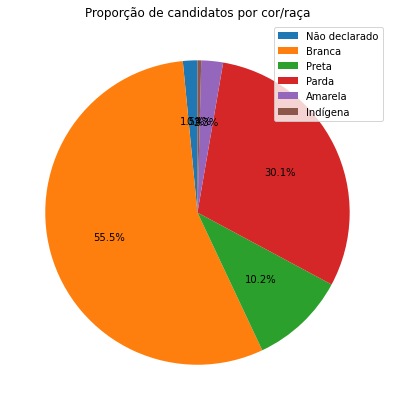

In [ ]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
inscritos = dados['TP_COR_RACA'].value_counts().sort_index()

plt.figure(figsize=(7,7))
plt.pie(x=inscritos, autopct='%1.1f%%', startangle=90)
plt.legend(cores, ncol=1, loc='upper right')
plt.title('Proporção de candidatos por cor/raça')
plt.show()

#dados["TP_ESCOLA"].value_counts().plot.pie(figsize=(6,6), autopct = '%1.1f%%')
#plt.legend(legenda, ncol=1, loc='upper right', bbox_to_anchor=(0.9,0.2,0.5,0.5))
#plt.title('Proporção de candidatos por tipo de escola')

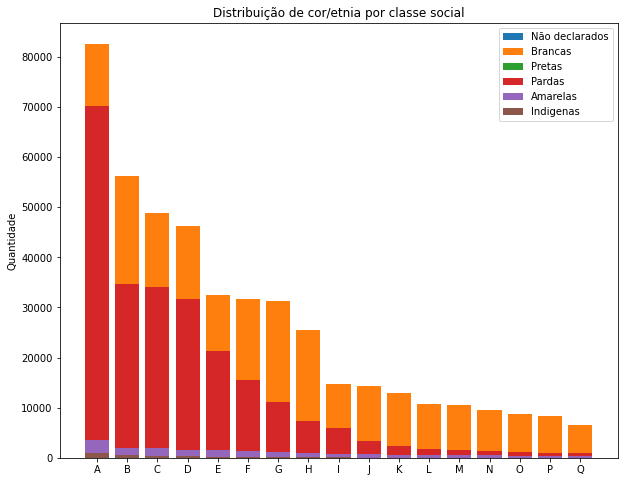

In [ ]:
nDeclarados = dados.query("TP_COR_RACA == 0")['Q006'].value_counts()
brancas = dados.query("TP_COR_RACA == 1")['Q006'].value_counts()
pretas = dados.query("TP_COR_RACA == 2")['Q006'].value_counts()
pardas = dados.query("TP_COR_RACA == 3")['Q006'].value_counts()
amarelas = dados.query("TP_COR_RACA == 4")['Q006'].value_counts()
indigenas = dados.query("TP_COR_RACA == 5")['Q006'].value_counts()

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(rendaOrdenada, nDeclarados, label='Não declarados')
ax.bar(rendaOrdenada, brancas, label='Brancas')
ax.bar(rendaOrdenada, pretas, label='Pretas')
ax.bar(rendaOrdenada, pardas, label='Pardas')
ax.bar(rendaOrdenada, amarelas, label='Amarelas')
ax.bar(rendaOrdenada, indigenas, label='Indigenas')

ax.set_ylabel('Quantidade')
ax.set_title('Distribuição de cor/etnia por classe social')
ax.legend()

plt.show()

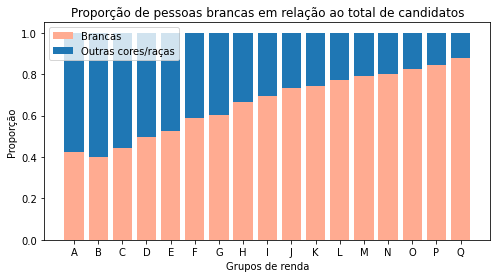

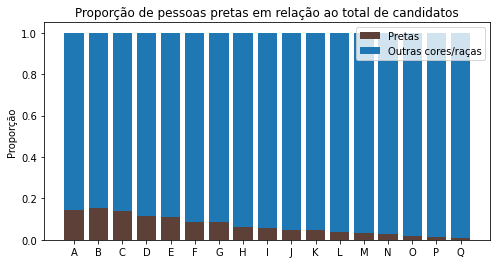

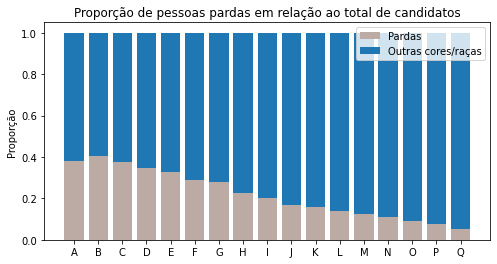

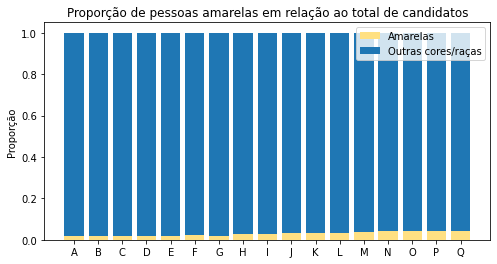

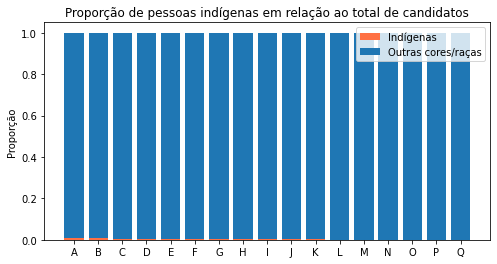

In [ ]:
#@title
brancasProp = brancas/totalPorRenda
outrasCoresProp = (totalPorRenda-brancas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, brancasProp, label='Brancas', color="#FFAB91")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=brancasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_xlabel('Grupos de renda')
ax.set_title('Proporção de pessoas brancas em relação ao total de candidatos')
ax.legend()

plt.show()

#-------------------------------------

pretasProp = pretas/totalPorRenda
outrasCoresProp = (totalPorRenda-pretas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, pretasProp, label='Pretas', color="#5D4037")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=pretasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção de pessoas pretas em relação ao total de candidatos')
ax.legend()

plt.show()

#-------------------------------------

pardasProp = pardas/totalPorRenda
outrasCoresProp = (totalPorRenda-pardas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, pardasProp, label='Pardas', color="#BCAAA4")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=pardasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção de pessoas pardas em relação ao total de candidatos')
ax.legend()

plt.show()

#-------------------------------------

amarelasProp = amarelas/totalPorRenda
outrasCoresProp = (totalPorRenda-amarelas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, amarelasProp, label='Amarelas', color="#FFE082")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=amarelasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção de pessoas amarelas em relação ao total de candidatos')
ax.legend()

plt.show()

#-------------------------------------

indigenasProp = indigenas/totalPorRenda
outrasCoresProp = (totalPorRenda-indigenas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, indigenasProp, label='Indígenas', color="#FF7043")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=indigenasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção de pessoas indígenas em relação ao total de candidatos')
ax.legend()

plt.show()

# Diferenças de Gênero

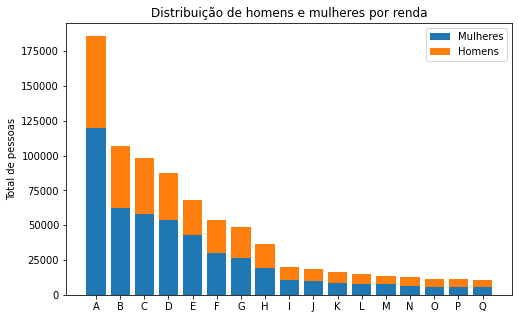

In [ ]:
mulheres = dados.query("TP_SEXO == 'F'")["Q006"].value_counts()
homens = dados.query("TP_SEXO == 'M'")["Q006"].value_counts()
 
fig, ax = plt.subplots(figsize=(8,5))
 
ax.bar(rendaOrdenada, mulheres, label='Mulheres')
ax.bar(rendaOrdenada, homens, bottom=mulheres, label='Homens')
 
ax.set_ylabel('Total de pessoas')
ax.set_title('Distribuição de homens e mulheres por renda')
ax.legend()
 
plt.show()

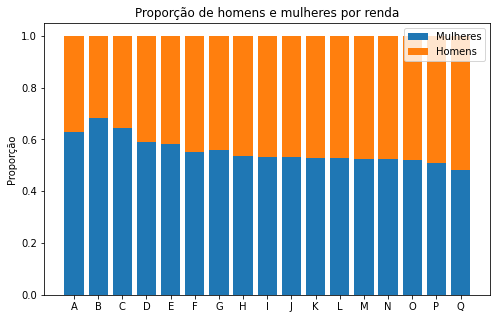

In [ ]:
mulheresProp = mulheres/(mulheres+homens)
homensProp = homens/(mulheres+homens)
 
fig, ax = plt.subplots(figsize=(8,5))
 
ax.bar(rendaOrdenada, mulheresProp, label='Mulheres')
ax.bar(rendaOrdenada, homensProp, bottom=mulheresProp, label='Homens')
 
ax.set_ylabel('Proporção')
ax.set_title('Proporção de homens e mulheres por renda')
ax.legend()
 
plt.show()

##Dados sobre pessoas trans

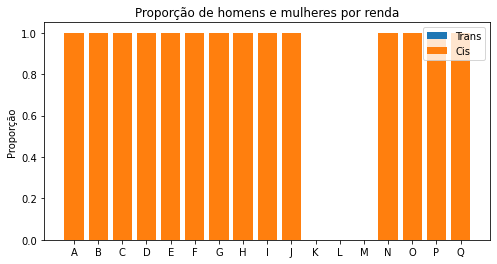

In [ ]:
trans = dados.query("IN_NOME_SOCIAL == 1")["Q006"].value_counts()
cis = dados.query("IN_NOME_SOCIAL == 0")["Q006"].value_counts()

transProp = trans/(trans+cis)
cisProp = cis/(trans+cis)
 
fig, ax = plt.subplots(figsize=(8,4))
 
ax.bar(rendaOrdenada, transProp, label='Trans')
ax.bar(rendaOrdenada, cisProp, bottom=transProp, label='Cis')
 
ax.set_ylabel('Proporção')
ax.set_title('Estimativa da proporção de pessoas trans por renda')
ax.legend()
 
plt.show()

Pensei que tinha feito algo errado na lógica do gráfico, mas não, infelizmente temos um dado triste sobre a realidade de pessoas trans.

# Pessoas trans: Um caso nítido de invisibilidade social
Mapear em números a diversidade presente na sociedade no geral não é tarefa fácil, mas falar de pessoas trans é ainda mais complicado.

O problema começa com o fato de não termos números concretos sobre o total de pessoas trans existentes no Brasil e a distribuição delas na sociedade, o que temos são estimativas de associações que se interessam pelos direitos e visibilidade dessas pessoas. A ANTRA (Associação Nacional de Travestis e Transexuais) estima que o Brasil tenha 1,9% de pessoas trans.

No caso de São Paulo, existe um projeto de mapeamento que começou em Janeiro de 2020 feito pela Coordenação de Políticas LGBTI da Prefeitura de São Paulo, do Centro de Estudos de Cultura Contemporânea – CEDEC. 

A ideia inicial era reunir cerca de 30 pesquisadores para sair às ruas em busca dessas pessoas, já que parte delas infelizmente se encontra em situação de rua e na prostituição. Com a Covid-19 foi necessário mudar o método de pesquisa, agora ela é feita pela internet e telefone. Ainda não foi apresentado nenhum número concreto, mas estima-se que seja mapeado cerca de 3.000 pessoas trans na cidade de São Paulo.

Fontes:




Text(0.5, 1.0, 'Distribuição de pessoas trans que fizeram Enem')

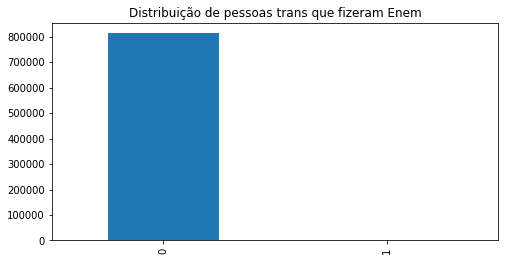

In [ ]:
#@title
dados["IN_NOME_SOCIAL"].value_counts().plot.bar(figsize=(8,4))
plt.title("Estimativa da distribuição de pessoas trans que fizeram Enem")

O gráfico acima faz parecer que não há nada no lado das pessoas que se inscreveram com o nome social, mas na verdade, estamos falando de 91 pessoas dentre 800.000 e mais uma vez é dificil mapear com precisão as pessoas trans que fizeram o Enem, pois, apesar de ter esse campo especificamente 

In [ ]:
len(dados.query("IN_NOME_SOCIAL == 1"))

91

Text(0.5, 1.0, 'Distribuição de pessoas trans por renda')

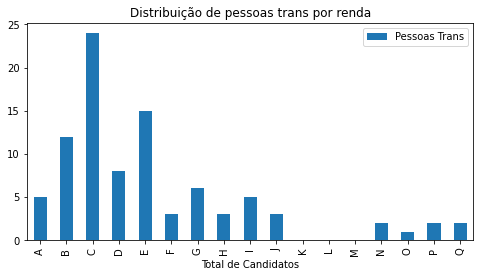

In [ ]:
pessoasTrans = dados.query("IN_NOME_SOCIAL == 1")["Q006"].value_counts()
 
index = rendaOrdenada
 
transPorRenda = pd.DataFrame({
    'Pessoas Trans' : pessoasTrans},
    index = index
    )
grafico = transPorRenda.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição de pessoas trans por renda")

Por que deveriamos nos importar?

Os 30 pesquisadores c

In [ ]:
sns.barplot()

In [ ]:
cis = dados.query("IN_NOME_SOCIAL == 0")["Q006"].value_counts()
cis

C    185855
E    106591
D     97924
B     78342
G     77106
F     53912
H     48686
I     36595
J     20003
Q     16390
N     16115
A     15616
K     14465
O     12832
P     11359
M     11026
L     10864
Name: Q006, dtype: int64

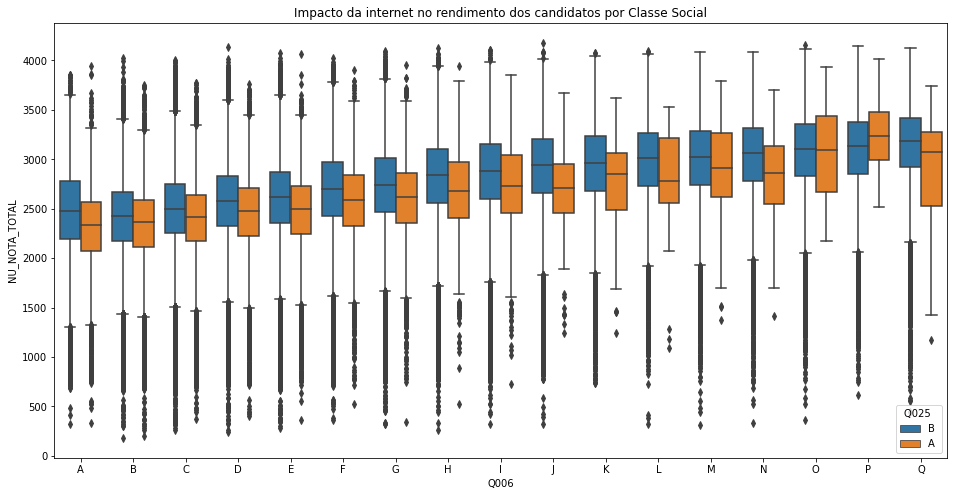

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Impacto da internet no rendimento dos candidatos por Classe Social")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_sem_nota_zero, order=rendaOrdenada, hue="Q025 ")

## O impacto do tipo de ensino nas notas do Enem
Não é de hoje que sabemos que há diferença entre o ensino público e privado.

Essa diferença infelizmente se reflete no Enem, alunos que estudam em escola privada tem notas melhores independente de qual grupo de renda pertença. Os motivos são variados, mas será que não podemos achar outros indícios e possível solução para a melhora no rendimento dos alunos de instituições públicas? 

Vamos começar nossa análise olhando para a distribuição dos candidados no tipo de escola:

*Pesquisar sobre porcentagem que estuda em escola privada e pública no Brasil

Text(0.5, 1.0, 'Proporção de candidatos por tipo de escola')

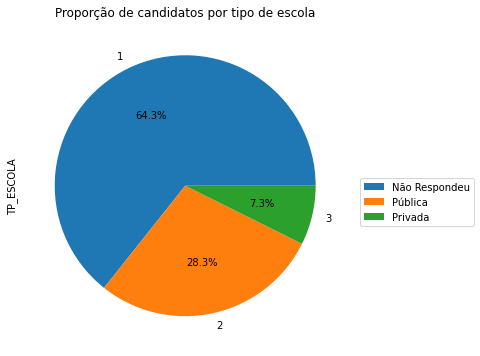

In [ ]:
#@title


**Ok, não esperava ver esse volume de pessoas sem responder essa questão!** 

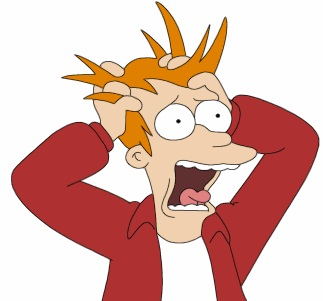



Mas calma! O gráfico abaixo ajuda a estimar onde essas pessoas estão. Analisemos:

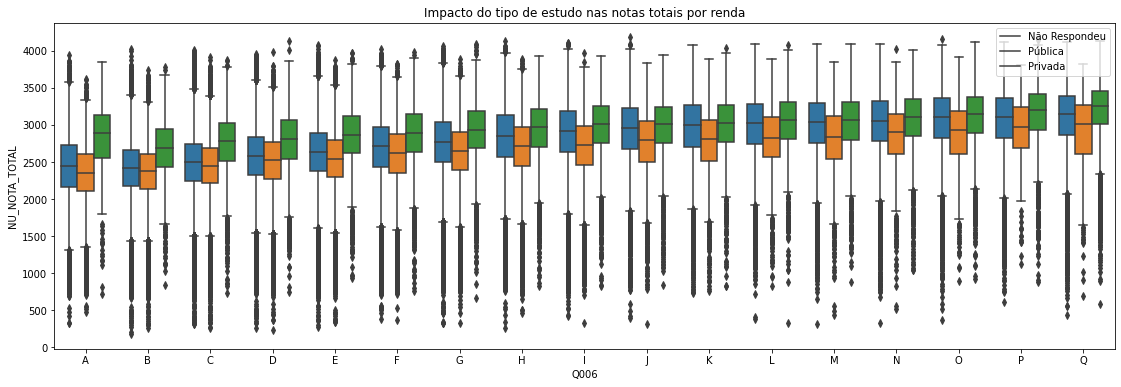

Veja que á partir do grupo I a barra azul fica praticamente no mesmo nível que a barra verde, então as notas dos que não responderam seu tipo de ensino está bem próxima das notas do pessoal da escola privada.

Os grupos G e H me deixam na dúvida, mas do grupo A ao F a barra azul fica mais próximo da laranja, indicando que esse grupo em incógnita pode ser do ensino público.

Lógico que essa distribuição que tracei aqui não é 100% correta e estou apenas a usando para estimar mesmo.

Ver por esse lado ajuda, mas ainda não nos permite avaliar como fica esse número no total, então vejamos de quantas pessoas estamos olhando por essa lógica:

In [ ]:
escola_n_respondido = dados.query("TP_ESCOLA == 1")["Q006"].value_counts()
escola_n_respondido

C    120467
D     66918
E     66415
B     51033
G     46908
F     35377
H     31337
I     22332
J     12746
A     10935
N     10343
Q     10035
K      8948
O      8271
P      7326
M      7043
L      6915
Name: Q006, dtype: int64

Vamos supor que as pessoas do grupo A ao G estudam em escola pública e do grupo H ao Q são de escola privada.

Ficamos então com **398.053** pessoas na escola **pública**.
Mais **125.296** de pessoas na escola **privada**.

Somando esses valores com o que já tínhamos, vejamos como ficou o gráfico agora:

In [ ]:
len(dados.query("TP_ESCOLA == 2"))

230655

In [ ]:
len(dados.query("TP_ESCOLA == 3"))

59768

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ac0a2c588>],
      dtype=object)

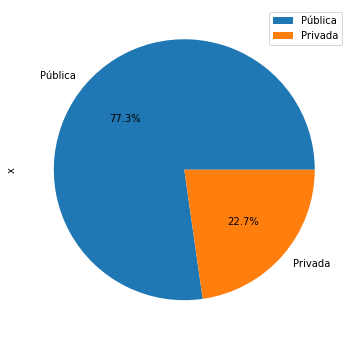

In [ ]:
#@title
PropEstimadas_TpEscola = pd.DataFrame([628708, 185064], index=['Pública', 'Privada'], columns=['x'])
# make the plot
PropEstimadas_TpEscola.plot.pie(figsize=(6,6), autopct = '%1.1f%%', subplots=True)

Particularmente acredito que a proporção do ensino privado é menor que o estimado, mas não oculta a forte indicação de que a maioria estuda em escola pública. 

As próximas análises serão feitas com base nos dados de candidados do ensino público e privado e a aplicaremos as conclusões para a proporção que definimos 

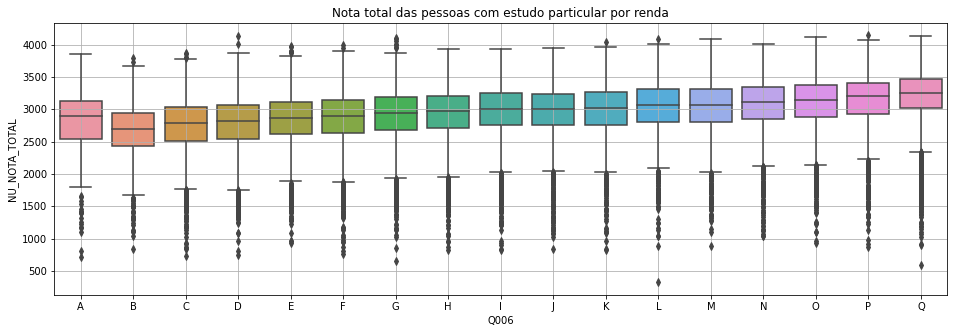

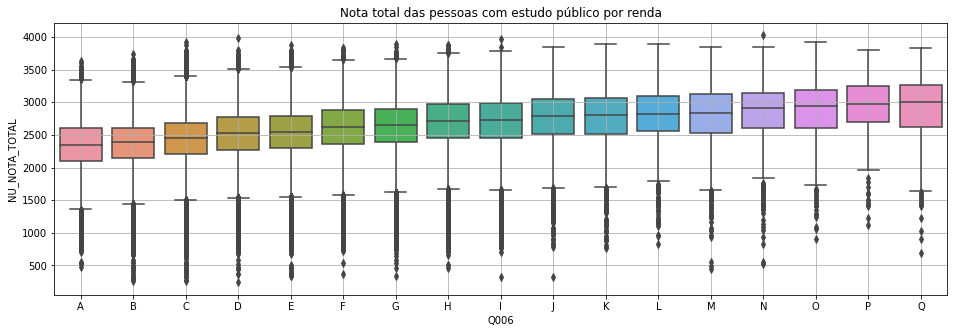

In [ ]:
#@title
plt.figure(figsize=(16,5))
plt.title("Nota total das pessoas com estudo particular por renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_particular, order=rendaOrdenada)
plt.grid(True)

plt.figure(figsize=(16,5))
plt.title("Nota total das pessoas com estudo público por renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_publico, order=rendaOrdenada)
plt.grid(True)

Um fator que achei interessante foi a nota do grupo A que tem ensino privado, é esse grupo que tem a nota maior dentro dos grupos de baixa renda, é possível sim se destacar mesmo sendo uma pessoa de origem humilde.

Mas mesmo com esse destaque, perceba que a nota ainda é menor do que as do grupo G em diante.

Isso nos diz que o ensino privado é um fator de vantagem, mas não é o único e infelizmente a tendência é a mesma do ensino público: as rendas mais baixas tem notas menores.

A questão é: quais são os outros fatores que fazem os melhores serem os melhores?

Text(0.5, 1.0, 'Distribuição por renda de pessoas que estudam em escola pública')

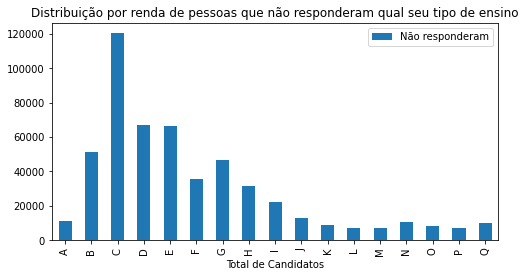

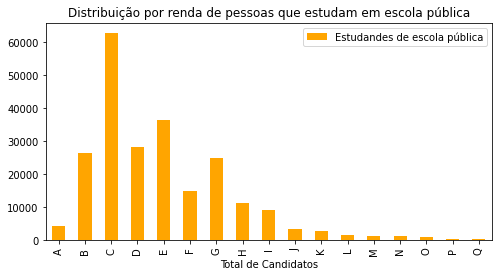

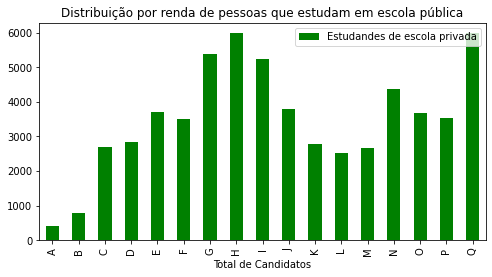

In [ ]:
#@title
escola_n_respondido = dados.query("TP_ESCOLA == 1")["Q006"].value_counts()
 
index = rendaOrdenada
 
dadosEscolaSemResposta = pd.DataFrame({
    'Não responderam' : escola_n_respondido},
    index = index
    )
grafico = dadosEscolaSemResposta.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição por renda de pessoas que não responderam qual seu tipo de ensino")

#--------------------------------------

escola_publica = dados.query("TP_ESCOLA == 2")["Q006"].value_counts()
 
index = rendaOrdenada
 
dadosEscolaPublica = pd.DataFrame({
    'Estudandes de escola pública' : escola_publica},
    index = index
    )
grafico = dadosEscolaPublica.plot.bar(figsize=(8,4), color='Orange')
plt.xlabel('Total de Candidatos')
plt.title("Distribuição por renda de pessoas que estudam em escola pública")

#--------------------------------------
escola_privada = dados.query("TP_ESCOLA == 3")["Q006"].value_counts()
 
index = rendaOrdenada
 
dadosEscolaPrivada = pd.DataFrame({
    'Estudandes de escola privada' : escola_privada},
    index = index
    )
grafico = dadosEscolaPrivada.plot.bar(figsize=(8,4), color='Green')
plt.xlabel('Total de Candidatos')
plt.title("Distribuição por renda de pessoas que estudam em escola pública")

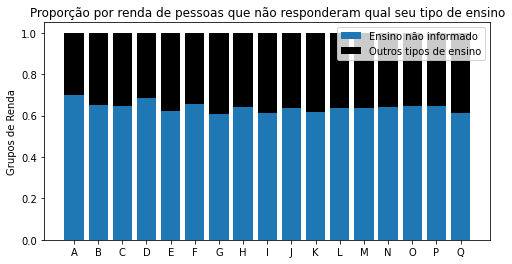

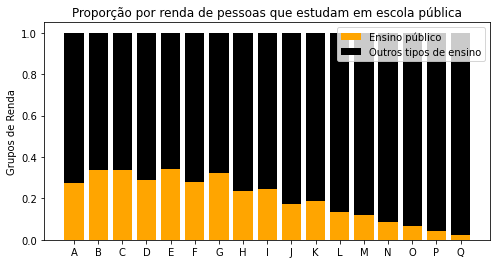

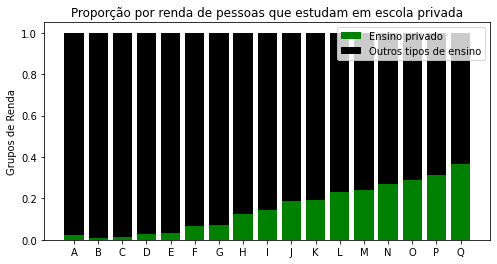

In [ ]:
#@title
escola_n_respondidoProp = escola_n_respondido/totalPorRenda
outrasEscolasProp = (totalPorRenda-escola_n_respondido)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, escola_n_respondidoProp, label='Ensino não informado')
ax.bar(rendaOrdenada, outrasEscolasProp, bottom=escola_n_respondidoProp, label='Outros tipos de ensino', color="Black")

ax.set_ylabel('Proporção')
ax.set_ylabel('Grupos de Renda')
ax.set_title('Proporção por renda de pessoas que não responderam qual seu tipo de ensino')
ax.legend()

plt.show()

#------------------------------------

escola_publicaProp = escola_publica/totalPorRenda
outrasEscolasProp = (totalPorRenda-escola_publica)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, escola_publicaProp, label='Ensino público', color="Orange")
ax.bar(rendaOrdenada, outrasEscolasProp, bottom=escola_publicaProp, label='Outros tipos de ensino', color="Black")

ax.set_ylabel('Proporção')
ax.set_ylabel('Grupos de Renda')
ax.set_title('Proporção por renda de pessoas que estudam em escola pública')
ax.legend()

plt.show()

#------------------------------------

escola_privadaProp = escola_privada/totalPorRenda
outrasEscolasProp = (totalPorRenda-escola_privada)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, escola_privadaProp, label='Ensino privado', color="Green")
ax.bar(rendaOrdenada, outrasEscolasProp, bottom=escola_privadaProp, label='Outros tipos de ensino', color="Black")

ax.set_ylabel('Proporção')
ax.set_ylabel('Grupos de Renda')
ax.set_title('Proporção por renda de pessoas que estudam em escola privada')
ax.legend()

plt.show()

In [ ]:
escola_sem_resposta = dados_sem_nota_zero.query("TP_ESCOLA == 1")
escola_sem_resposta.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B,3283.5
8,40801,190001045429,2019,3518800,Guarulhos,35,SP,23,F,1,1,1,3550308.0,São Paulo,35.0,SP,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDABE99999BCBAADABEDCAAECAAECBECBCCAEDAABDADBE...,ADDEEEAADDEBAECBCDBACECEAACABCACADEDCEABECADB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,180.0,180.0,160.0,880.0,E,F,B,D,4,J,A,C,D,A,A,B,B,B,A,B,A,B,C,B,B,D,B,B,B,3577.6
12,48930,190001053558,2019,3516200,Franca,35,SP,32,M,1,3,1,3152907.0,Pratápolis,31.0,MG,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCBCCCDDEBEACCBEECCACBCCBDBAECDEBECCCBA...,DCCBEECCBDABAADECCCBAEEBEECCBBBCABAACEDDEEDCA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,B,B,B,3,C,A,B,D,B,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B,2795.9
15,69572,190001074201,2019,3547809,Santo André,35,SP,20,F,1,3,1,1302603.0,Manaus,13.0,AM,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999CBCAADABABDCADEAAAECDEBABDCAEDADBDAADABED...,ACAABBBCCDCBDCDCABCBBDDCEDBCADCDBEBACAECDDBEE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,100.0,80.0,540.0,E,E,D,D,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,D,A,B,B,2534.2
17,73393,190001078022,2019,3550308,São Paulo,35,SP,26,M,1,1,1,3550308.0,São Paulo,35.0,SP,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999CEACACBABAECBBCCAECCBDBBCDDEDCAADDDECAECA...,EEBADCDBABCBCDEACEABACCEBADBDEECEBCECDCBABDDA,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,180.0,200.0,200.0,200.0,120.0,900.0,C,B,D,B,2,D,A,B,C,A,A,B,A,B,A,B,A,A,A,A,A,C,A,C,B,3471.9


Duas coisas interessantes para se perceber com os dois gráficos acima:
1. Independente da renda, quem estuda em escola pública tende a tirar notas mais baixas do que quem estuda em escola particular evidenciando a diferença do ensino no Brasil, mais um fator de desigualdade.
2. O destaque das notas do grupo A no gráfico de ensino particular que chega no mesmo nível da classe G, o que será que motiva esse aumento nas notas em relação aos outros grupos das classes mais baixas? Outro ponto, é que apesar do rendimento ser melhor, ainda é abaixo das classes mais altas. No ensino particular também há a tendência das classes mais baixas terem notas menores.

Text(0.5, 1.0, 'Proporção de quem tem internet em casa')

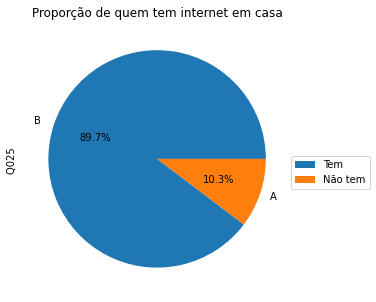

In [ ]:
legenda = ['Tem','Não tem']
dados["Q025 "].value_counts().plot.pie(figsize=(5,5), autopct = '%1.1f%%',)
plt.legend(legenda, ncol=1, loc='center right', bbox_to_anchor=(0.8,0.2,0.5,0.5))
plt.title('Proporção de quem tem internet em casa')


Text(0.5, 1.0, 'Distribuição de pessoas que estudam em escola particular por renda')

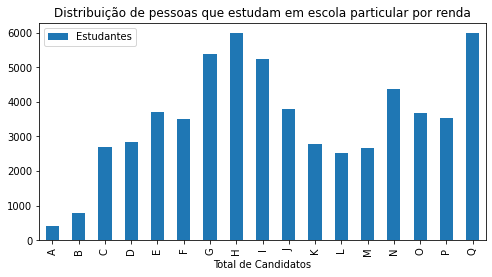

In [ ]:
escolaParticular = dados.query("TP_ESCOLA == 3")["Q006"].value_counts()
 
index = rendaOrdenada
 
escPartcPorRenda = pd.DataFrame({
    'Estudantes' : escolaParticular},
    index = index
    )
grafico = escPartcPorRenda.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição de pessoas que estudam em escola particular por renda")

In [ ]:
dados_estudo_particular = dados_sem_nota_zero.query("TP_ESCOLA == 3")
dados_estudo_particular.head()

## Talvez o Hapkido possa nos ajudar!

O Hapkido é uma arte marcial focada em defesa pessoal, e sim, eu sei que parece loucura trazer à tona uma arte marcial que pratiquei enquanto estamos refletindo sobre caminhos para melhorar o ensino no estado de São Paulo e até mesmo no Brasil, mas vai fazer sentido, prometo!

Artes marciais não são apenas formas de aprendermos a nos defender e/ou machucar o amiguinho, elas tem toda uma filosofia por trás que pode ajudar o praticante a ver o mundo de outras formas e se tornar uma pessoa melhor através dela. Com o Hapkido não é diferente e o cerne de sua filosia está no próprio nome: **HAP** - União, **KI** - Energia, **DO** - Caminho.

Sabe o KI de DragonBall? Aquela energia que potencializa nossas capacidades e nos ajuda a ter resistência para o combate? O KI é basicamente isso mesmo... Nós só não viramos Super Sayajins e nem lançamos Kame-Hame-Ha, mas é através do aparfeiçoamento do controle da nossa energia que conseguimos aplicar golpes eficientemente.

Porém, esse aperfeiçoamento não é conquistado individualmente, mas sim pelo HAP, a união. Lógico, parte do mérito é sim da pessoa enquanto indivíduo, mas parte de sua conquista vem dos ensinamentos do mestre e vem das pessoas ao redor que a ajudaram a chegar onde está.

Todo aluno é incentivado não só a buscar o próprio aparfeiçoamento, mas também auxiliar quem está ao seu lado, ajudar a minimizar a dificuldade que outra pessoa pode ter e estar alí para incentivá-la caso ela não se sinta capaz de conseguir a próxima faixa justamente por ter essas dificuldades. No Hapkido, um faixa branca (o grau mais baixo) conquistando a sua primeira ponta amarela é tão valioso quanto alguém conquistando a faixa preta (o grau mais alto).

Eu acredito que metodologia pode ser aplicada na educação do Brasil, não será fácil, mas acredito ser possível se trabalharmos duro e juntos para isso!

# A Imersão Dados é Hapkido!

Não, ninguém tentou se bater e não foi discutido formas de soltar Kame-hame-ha, mas houve uma união muito bacana dentro do servidor para fazer os desafios e passar conhecimento para ajudar aqueles que tiveram mais dificuldade com o entendimento das aulas. Me surpreendi com o ambiente saudável e acolhedor do servidor que justamente foi o que me ajudou a não desanimar e afastar o pensamento de que não teria 

